In [108]:
import pandas as pd
import numpy as np
#import xgboost as xgb
#from sklearn.model_selection import train_test_split,GridSearchCV
#from sklearn.metrics import accuracy_score,roc_auc_score,make_scorer,confusion_matrix
#from sklearn.metrics import plot_confusion_matrix,plot_roc_curve

In [110]:
!pip install openpyxl

In [111]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [112]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [114]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [115]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [116]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [117]:
tobe_dropped = ['Churn Label','Churn Score','CLTV','Churn Reason']
df.drop(tobe_dropped,axis=1,inplace=True)

In [118]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [119]:
tobe_dropped_unique_values = ['State','Country','Count']
df.drop(tobe_dropped_unique_values,axis=1,inplace=True)

In [120]:
tobe_dropped_unique_single_value_for_each_observation = ['Lat Long','CustomerID']
df.drop(tobe_dropped_unique_single_value_for_each_observation,axis=1,inplace=True)

In [121]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [122]:
df['City'].replace(' ','_',regex=True,inplace=True)

/var/folders/p0/l0f81wr95lqgtrh7g618gzbw0000gn/T/ipykernel_69595/971019579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(' ','_',regex=True,inplace=True)


In [123]:
df['City']

0        Los_Angeles
1        Los_Angeles
2        Los_Angeles
3        Los_Angeles
4        Los_Angeles
            ...     
7038         Landers
7039        Adelanto
7040           Amboy
7041    Angelus_Oaks
7042    Apple_Valley
Name: City, Length: 7043, dtype: object

df.columns = df.columns.str.replace(' ', '_')

df.head()

In [124]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [125]:
df.dtypes

City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Value            int64
dtype: object

In [126]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [127]:
df['Total Charges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: Total Charges, Length: 7043, dtype: object

In [128]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [129]:
df.columns = df.columns.str.replace(' ', '_')

In [130]:
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [131]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')

In [132]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [133]:
df.loc[(df['Total_Charges'] == ' ','Total_Charges')] = 0

In [134]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

In [135]:
df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [136]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [137]:
df.replace(' ','_',inplace=True,regex=True)

In [138]:
X = df.drop('Churn_Value',axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [139]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

In [140]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

# ONE-HOT-CODER

In [141]:
X['Payment_Method'].unique()

array(['Mailed_check', 'Electronic_check', 'Bank_transfer_(automatic)',
       'Credit_card_(automatic)'], dtype=object)

In [142]:
X['Streaming_TV'].unique()

array(['No', 'Yes', 'No_internet_service'], dtype=object)

In [143]:
pd.get_dummies(X,columns=['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,False,False,False,True
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,False,False,True,False
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,False,False,True,False
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,False,False,True,False
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,True,False,False,False


In [144]:
X_encoded = pd.get_dummies(X, columns=[
    'City',
    'Multiple_Lines',
    'Internet_Service',
    'Contract',
    'Streaming_TV',
    'Gender',
    'Senior_Citizen',
    'Partner',
    'Dependents',
    'Phone_Service',
    'Payment_Method',
    'Streaming_Movies',
    'Online_Security',
    'Online_Backup',
    'Device_Protection',
    'Tech_Support',
    'Paperless_Billing'
], drop_first=False)

In [145]:
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Online_Backup_No_internet_service,Online_Backup_Yes,Device_Protection_No,Device_Protection_No_internet_service,Device_Protection_Yes,Tech_Support_No,Tech_Support_No_internet_service,Tech_Support_Yes,Paperless_Billing_No,Paperless_Billing_Yes
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,True,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,False,True,False,False,True,True,False,False,False,True


In [146]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 1178 entries, Zip_Code to Paperless_Billing_Yes
dtypes: bool(1172), float64(4), int64(2)
memory usage: 8.2 MB


In [147]:
X_encoded.dtypes

Zip_Code                              int64
Latitude                            float64
Longitude                           float64
Tenure_Months                         int64
Monthly_Charges                     float64
                                     ...   
Tech_Support_No                        bool
Tech_Support_No_internet_service       bool
Tech_Support_Yes                       bool
Paperless_Billing_No                   bool
Paperless_Billing_Yes                  bool
Length: 1178, dtype: object

In [148]:
y.unique()

array([1, 0])

In [149]:
X_encoded.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [150]:
# Select columns with dtype 'object'
object_columns = X_encoded.select_dtypes(include='object')

# Display the DataFrame with only 'object' dtype columns
print(object_columns)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[7043 rows x 0 columns]


In [151]:
# Convert all columns to float
X_encoded = X_encoded.astype(float)

# Alternatively, use:
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')  # Converts to float and handles errors

In [152]:
X_encoded.dtypes.unique()

array([dtype('float64')], dtype=object)

In [153]:
X_encoded.columns

Index(['Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges',
       'Total_Charges', 'City_Acampo', 'City_Acton', 'City_Adelanto',
       'City_Adin',
       ...
       'Online_Backup_No_internet_service', 'Online_Backup_Yes',
       'Device_Protection_No', 'Device_Protection_No_internet_service',
       'Device_Protection_Yes', 'Tech_Support_No',
       'Tech_Support_No_internet_service', 'Tech_Support_Yes',
       'Paperless_Billing_No', 'Paperless_Billing_Yes'],
      dtype='object', length=1178)

In [154]:
sum(y)/len(y) # the percentage that left the Telco Company

0.2653698707936959

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42,stratify=y)

In [157]:
sum(y_train)/len(y_train)

0.2654297614539947

In [158]:
sum(y_test)/len(y_test)

0.26519023282226006

In [166]:
import xgboost as xgb
from xgboost import XGBClassifier

In [169]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing = None,seed=42,
                            early_stopping_rounds=10,
                            eval_metric = 'aucpr')

In [170]:
clf_xgb.fit(X_train,y_train,verbose=True,
            eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.64139
[1]	validation_0-aucpr:0.65159
[2]	validation_0-aucpr:0.65905
[3]	validation_0-aucpr:0.65746
[4]	validation_0-aucpr:0.65824
[5]	validation_0-aucpr:0.65422
[6]	validation_0-aucpr:0.65542
[7]	validation_0-aucpr:0.66081
[8]	validation_0-aucpr:0.66113
[9]	validation_0-aucpr:0.65965
[10]	validation_0-aucpr:0.66010
[11]	validation_0-aucpr:0.65953
[12]	validation_0-aucpr:0.66012
[13]	validation_0-aucpr:0.66022
[14]	validation_0-aucpr:0.66015
[15]	validation_0-aucpr:0.66056
[16]	validation_0-aucpr:0.66054
[17]	validation_0-aucpr:0.66099
[18]	validation_0-aucpr:0.66191
[19]	validation_0-aucpr:0.65886
[20]	validation_0-aucpr:0.65882
[21]	validation_0-aucpr:0.65867
[22]	validation_0-aucpr:0.65779
[23]	validation_0-aucpr:0.65908
[24]	validation_0-aucpr:0.65910
[25]	validation_0-aucpr:0.65859
[26]	validation_0-aucpr:0.65913
[27]	validation_0-aucpr:0.65796


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [174]:

# Ensure X_test is a numpy array or pandas DataFrame
X_test = np.array(X_test)  # Convert to numpy array if needed

# Or, if using pandas
# X_test = pd.DataFrame(X_test)

In [175]:
print(X_test.shape)
print(clf_xgb.get_booster().feature_names)

(1761, 1178)
['Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'City_Acampo', 'City_Acton', 'City_Adelanto', 'City_Adin', 'City_Agoura_Hills', 'City_Aguanga', 'City_Ahwahnee', 'City_Alameda', 'City_Alamo', 'City_Albany', 'City_Albion', 'City_Alderpoint', 'City_Alhambra', 'City_Aliso_Viejo', 'City_Alleghany', 'City_Alpaugh', 'City_Alpine', 'City_Alta', 'City_Altadena', 'City_Alturas', 'City_Alviso', 'City_Amador_City', 'City_Amboy', 'City_Anaheim', 'City_Anderson', 'City_Angels_Camp', 'City_Angelus_Oaks', 'City_Angwin', 'City_Annapolis', 'City_Antelope', 'City_Antioch', 'City_Anza', 'City_Apple_Valley', 'City_Applegate', 'City_Aptos', 'City_Arbuckle', 'City_Arcadia', 'City_Arcata', 'City_Armona', 'City_Arnold', 'City_Aromas', 'City_Arroyo_Grande', 'City_Artesia', 'City_Arvin', 'City_Atascadero', 'City_Atherton', 'City_Atwater', 'City_Auberry', 'City_Auburn', 'City_Avalon', 'City_Avenal', 'City_Avery', 'City_Avila_Beach', 'City_Azusa', 'City_Badge

In [177]:
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Online_Backup_No_internet_service,Online_Backup_Yes,Device_Protection_No,Device_Protection_No_internet_service,Device_Protection_Yes,Tech_Support_No,Tech_Support_No_internet_service,Tech_Support_Yes,Paperless_Billing_No,Paperless_Billing_Yes
0,90003.0,33.964131,-118.272783,2.0,53.85,108.15,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,90005.0,34.059281,-118.307420,2.0,70.70,151.65,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,90006.0,34.048013,-118.293953,8.0,99.65,820.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,90010.0,34.062125,-118.315709,28.0,104.80,3046.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,90015.0,34.039224,-118.266293,49.0,103.70,5036.30,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [240]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=42,stratify=y)

# Initialize and train the classifier
clf_xgb = XGBClassifier(seed = 42,
                        objective='binary:logistic',
                        early_stopping_rounds=10,eval_metric='aucpr')
clf_xgb.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

# Make predictions
y_predict = clf_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

[0]	validation_0-aucpr:0.64139
[1]	validation_0-aucpr:0.65159
[2]	validation_0-aucpr:0.65905
[3]	validation_0-aucpr:0.65746
[4]	validation_0-aucpr:0.65824
[5]	validation_0-aucpr:0.65422
[6]	validation_0-aucpr:0.65542
[7]	validation_0-aucpr:0.66081
[8]	validation_0-aucpr:0.66113
[9]	validation_0-aucpr:0.65965
[10]	validation_0-aucpr:0.66010
[11]	validation_0-aucpr:0.65953
[12]	validation_0-aucpr:0.66012
[13]	validation_0-aucpr:0.66022
[14]	validation_0-aucpr:0.66015
[15]	validation_0-aucpr:0.66056
[16]	validation_0-aucpr:0.66054
[17]	validation_0-aucpr:0.66099
[18]	validation_0-aucpr:0.66191
[19]	validation_0-aucpr:0.65886
[20]	validation_0-aucpr:0.65882
[21]	validation_0-aucpr:0.65867
[22]	validation_0-aucpr:0.65779
[23]	validation_0-aucpr:0.65908
[24]	validation_0-aucpr:0.65910
[25]	validation_0-aucpr:0.65859
[26]	validation_0-aucpr:0.65913
[27]	validation_0-aucpr:0.65796
Accuracy: 0.81


In [204]:
import sklearn
print(sklearn.__version__)

1.5.1


In [205]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


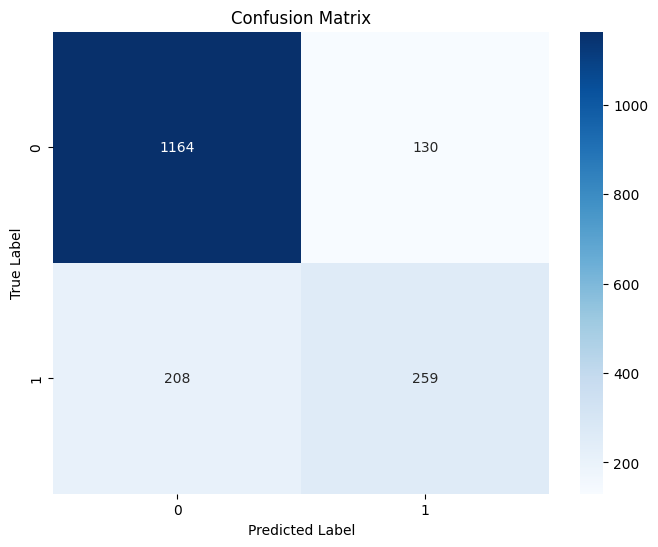

In [241]:
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [210]:
y_predict = clf_xgb.predict(X_test)


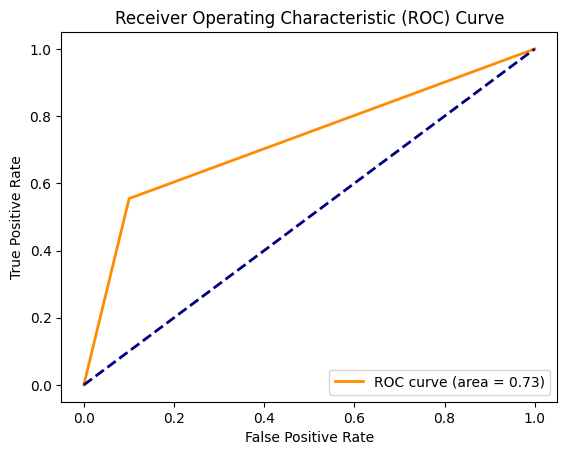

In [242]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test is your true labels and y_prob are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Fine Tuning ( Optimization )



- **objective**: `'binary:logistic'`  
  Specifies the learning task as binary classification using a logistic regression model.

- **early_stopping_rounds**: `10`  
  Stops training if the validation score does not improve for 10 consecutive rounds.

- **eval_metric**: `'aucpr'`  
  Evaluation metric is set to the Area Under the Precision-Recall Curve, which is useful for imbalanced datasets.

- **gamma**: `0.25`  
  Minimum loss reduction required to make a further partition on a leaf node of the tree. A larger value leads to a more conservative model.

- **learning_rate**: `0.5`  
  Controls the step size at each iteration while moving toward a minimum of the loss function. A higher value accelerates training but risks overshooting.

- **max_depth**: `4`  
  Maximum depth of a tree. Controls model complexity and helps prevent overfitting.

- **n_estimators**: `20`  
  Number of boosting rounds or trees to build. Fewer trees can help reduce overfitting.

- **subsample**: `0.9`  
  Fraction of samples used to grow trees. Helps prevent overfitting by introducing randomness.

- **colsample_bytree**: `0.5`  
  Fraction of features to be randomly sampled for each tree. Helps improve generalization by reducing overfitting.

- **reg_lambda**: `10`  
  L2 regularization term on weights to control complexity and prevent overfitting. Higher values indicate stronger regularization.

- **scale_pos_weight**: `3`  
  Balances the positive and negative classes in imbalanced datasets by weighting the positive class.



In [245]:
clf_xgb = XGBClassifier(seed = 42,
                        objective='binary:logistic',
                        early_stopping_rounds=10,
                        eval_metric='aucpr',
                        gamma=0.25,
                        learning_rate=0.5,
                        max_depth=4,
                        n_estimators=20,
                        subsample=0.9,
                        colsample_bytree = 0.5 ,
                        reg_lambd=10,
                        scale_pos_weight=3)
clf_xgb.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

# Make predictions
y_predict = clf_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

[0]	validation_0-aucpr:0.55534
[1]	validation_0-aucpr:0.57950
[2]	validation_0-aucpr:0.59212
[3]	validation_0-aucpr:0.62328
[4]	validation_0-aucpr:0.63930
[5]	validation_0-aucpr:0.64964
[6]	validation_0-aucpr:0.65635
[7]	validation_0-aucpr:0.65245
[8]	validation_0-aucpr:0.64206
[9]	validation_0-aucpr:0.64096
[10]	validation_0-aucpr:0.64808
[11]	validation_0-aucpr:0.64598
[12]	validation_0-aucpr:0.64950
[13]	validation_0-aucpr:0.64829
[14]	validation_0-aucpr:0.64975
[15]	validation_0-aucpr:0.64930
[16]	validation_0-aucpr:0.64859


/Users/alexparsee/Python_main/venv_3.12/myenv_3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:46:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "reg_lambd" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.75


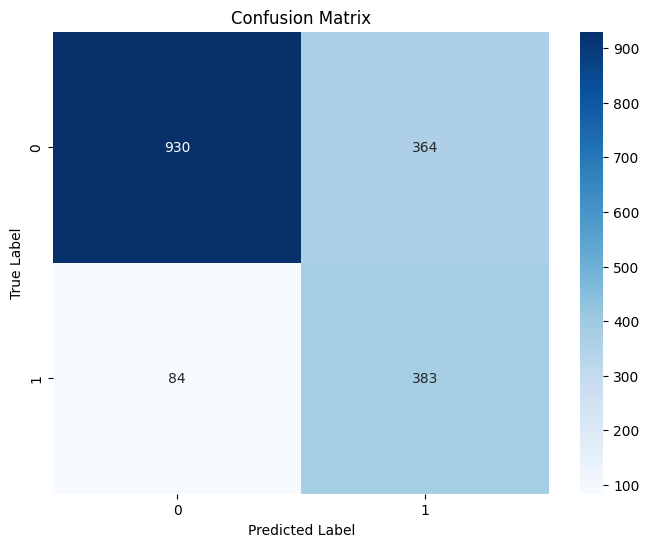

In [246]:
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

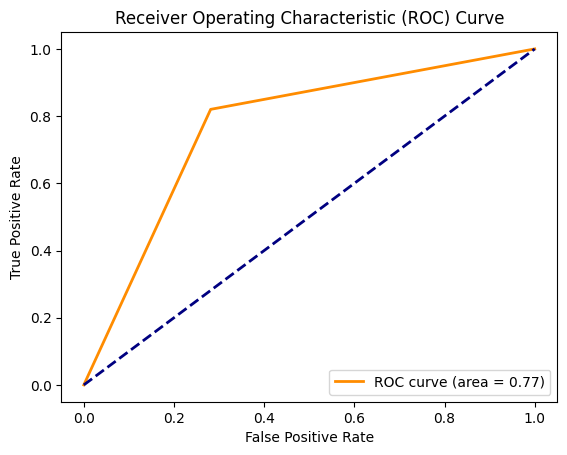

In [247]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()